In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models

In [2]:
import os
import random
import cv2
import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv("full_df.csv")
df.sample(5)

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
194,227,58,Female,227_left.jpg,227_right.jpg,normal fundus,macular epiretinal membrane,0,0,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['O'],"[0, 0, 0, 0, 0, 0, 0, 1]",227_right.jpg
5612,3318,57,Male,3318_left.jpg,3318_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",3318_left.jpg
3029,4489,54,Female,4489_left.jpg,4489_right.jpg,normal fundus,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4489_right.jpg
2343,3231,58,Female,3231_left.jpg,3231_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",3231_right.jpg
5313,2991,30,Female,2991_left.jpg,2991_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",2991_left.jpg


In [15]:
img_dir = r'C:\Users\KIIT\Documents\Deep Learning\preprocessed_images'

In [28]:
df_left_gal = df[df['Left-Diagnostic Keywords'] == 'glaucoma']
df_left_gal.head()

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
129,153,79,Male,153_left.jpg,153_right.jpg,glaucoma,dry age-related macular degeneration,0,0,1,0,1,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['A'],"[0, 0, 0, 0, 1, 0, 0, 0]",153_right.jpg
141,167,71,Male,167_left.jpg,167_right.jpg,glaucoma,glaucoma,0,0,1,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['G'],"[0, 0, 1, 0, 0, 0, 0, 0]",167_right.jpg
510,583,54,Male,583_left.jpg,583_right.jpg,glaucoma,glaucoma,0,0,1,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['G'],"[0, 0, 1, 0, 0, 0, 0, 0]",583_right.jpg
986,1209,69,Female,1209_left.jpg,1209_right.jpg,glaucoma,glaucoma,0,0,1,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['G'],"[0, 0, 1, 0, 0, 0, 0, 0]",1209_right.jpg
987,1210,62,Male,1210_left.jpg,1210_right.jpg,glaucoma,glaucoma,0,0,1,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['G'],"[0, 0, 1, 0, 0, 0, 0, 0]",1210_right.jpg


In [30]:
df_rt_gal = df[df['Right-Diagnostic Keywords'] == 'glaucoma']
df_rt_gal.head()

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
141,167,71,Male,167_left.jpg,167_right.jpg,glaucoma,glaucoma,0,0,1,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['G'],"[0, 0, 1, 0, 0, 0, 0, 0]",167_right.jpg
510,583,54,Male,583_left.jpg,583_right.jpg,glaucoma,glaucoma,0,0,1,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['G'],"[0, 0, 1, 0, 0, 0, 0, 0]",583_right.jpg
986,1209,69,Female,1209_left.jpg,1209_right.jpg,glaucoma,glaucoma,0,0,1,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['G'],"[0, 0, 1, 0, 0, 0, 0, 0]",1209_right.jpg
987,1210,62,Male,1210_left.jpg,1210_right.jpg,glaucoma,glaucoma,0,0,1,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['G'],"[0, 0, 1, 0, 0, 0, 0, 0]",1210_right.jpg
989,1212,73,Female,1212_left.jpg,1212_right.jpg,glaucoma,glaucoma,0,0,1,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['G'],"[0, 0, 1, 0, 0, 0, 0, 0]",1212_right.jpg


In [31]:
df_gal_filenames = df_left_gal['Left-Fundus'].append(df_rt_gal['Right-Fundus'], ignore_index=True)
df_gal_filenames.head()

0     153_left.jpg
1     167_left.jpg
2     583_left.jpg
3    1209_left.jpg
4    1210_left.jpg
dtype: object

In [32]:
len(df_gal_filenames)

397

(512, 512, 3)
1268_left.jpg


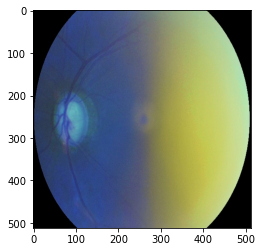

In [33]:
img = df_gal_filenames[34]
image = cv2.imread(os.path.join(img_dir, img))
plt.imshow(image)
print(image.shape)
print(img)

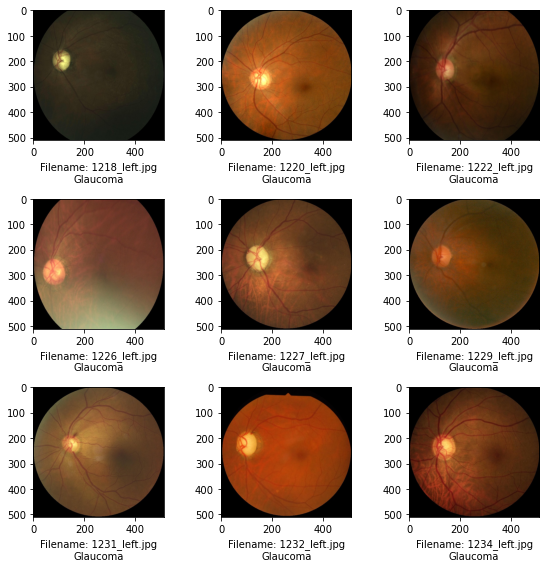

In [35]:
plt.figure(figsize=(8,8))
for i in range(9):
    img = df_gal_filenames[i+9]
    image = cv2.imread(os.path.join(img_dir, img))
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.subplot(3,3,i+1)
    plt.imshow(image_rgb)
    plt.xlabel('Filename: {}\n''Glaucoma'.format(df_gal_filenames[i+9]))
    
plt.tight_layout()

In [36]:
df_left_nor = df[df['Left-Diagnostic Keywords'] == 'normal fundus']
df_left_nor.head()

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
7,8,59,Male,8_left.jpg,8_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",8_right.jpg
8,9,54,Male,9_left.jpg,9_right.jpg,normal fundus,vitreous degeneration,0,0,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['O'],"[0, 0, 0, 0, 0, 0, 0, 1]",9_right.jpg
12,14,55,Male,14_left.jpg,14_right.jpg,normal fundus,macular epiretinal membrane,0,0,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['O'],"[0, 0, 0, 0, 0, 0, 0, 1]",14_right.jpg
13,15,50,Male,15_left.jpg,15_right.jpg,normal fundus,myelinated nerve fibers,0,0,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['O'],"[0, 0, 0, 0, 0, 0, 0, 1]",15_right.jpg


In [37]:
df_rt_nor = df[df['Right-Diagnostic Keywords'] == 'normal fundus']
df_rt_nor.head()

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
7,8,59,Male,8_left.jpg,8_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",8_right.jpg
9,10,70,Male,10_left.jpg,10_right.jpg,epiretinal membrane,normal fundus,0,0,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",10_right.jpg
24,29,59,Male,29_left.jpg,29_right.jpg,epiretinal membrane,normal fundus,0,0,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",29_right.jpg


In [38]:
df_nor_filenames = df_left_nor['Left-Fundus'].append(df_rt_nor['Right-Fundus'],ignore_index=True)
df_nor_filenames

0           1_left.jpg
1           8_left.jpg
2           9_left.jpg
3          14_left.jpg
4          15_left.jpg
             ...      
5496    4642_right.jpg
5497    4644_right.jpg
5498    4660_right.jpg
5499    4671_right.jpg
5500    4689_right.jpg
Length: 5501, dtype: object

In [40]:
len(df_nor_filenames)

5501

In [41]:
df_nor_filenames = df_nor_filenames.sample(397)
df_nor_filenames = df_nor_filenames.reset_index(drop=True)
df_nor_filenames.head()

0    3425_right.jpg
1    2543_right.jpg
2    3036_right.jpg
3    2431_right.jpg
4    2567_right.jpg
dtype: object

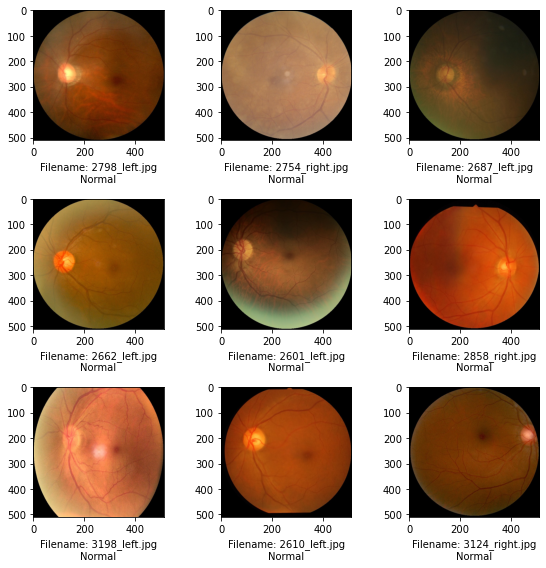

In [42]:
# Grid images of normal eye

plt.figure(figsize=(8,8))
for i in range(9):
    img = df_nor_filenames[i+9]
    image = cv2.imread(os.path.join(img_dir, img))
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.subplot(3,3,i+1)
    plt.imshow(image_rgb)
    plt.xlabel('Filename: {}\n''Normal'.format(df_nor_filenames[i+9]))
    
plt.tight_layout()

In [43]:
df_gal_filenames = pd.DataFrame(df_gal_filenames, columns = ["filename"])
df_gal_filenames["label"] = "glaucoma"
df_gal_filenames.head()

,filename,label
0,153_left.jpg,glaucoma
1,167_left.jpg,glaucoma
2,583_left.jpg,glaucoma
3,1209_left.jpg,glaucoma
4,1210_left.jpg,glaucoma


In [44]:
df_nor_filenames

0      3425_right.jpg
1      2543_right.jpg
2      3036_right.jpg
3      2431_right.jpg
4      2567_right.jpg
            ...      
392      425_left.jpg
393    2853_right.jpg
394     3188_left.jpg
395    3126_right.jpg
396    1423_right.jpg
Length: 397, dtype: object

In [45]:
df_nor_filenames = pd.DataFrame(df_nor_filenames, columns = ["filename"])
df_nor_filenames["label"] = "normal"
df_nor_filenames.head()

,filename,label
0,3425_right.jpg,normal
1,2543_right.jpg,normal
2,3036_right.jpg,normal
3,2431_right.jpg,normal
4,2567_right.jpg,normal


In [46]:
df_combined = df_gal_filenames.append(df_nor_filenames,ignore_index = True)
df_combined

,filename,label
0,153_left.jpg,glaucoma
1,167_left.jpg,glaucoma
2,583_left.jpg,glaucoma
3,1209_left.jpg,glaucoma
4,1210_left.jpg,glaucoma
...,...,...
789,425_left.jpg,normal
790,2853_right.jpg,normal
791,3188_left.jpg,normal
792,3126_right.jpg,normal


In [48]:
df_combined = df_combined.sample(794)
df_combined = df_combined.reset_index(drop=True)
df_combined

,filename,label
0,1306_right.jpg,glaucoma
1,2171_right.jpg,normal
2,1288_left.jpg,glaucoma
3,1389_right.jpg,glaucoma
4,2471_left.jpg,normal
...,...,...
789,1345_left.jpg,glaucoma
790,196_right.jpg,normal
791,3276_left.jpg,normal
792,1218_left.jpg,glaucoma


In [49]:
a  = np.array(df_combined.filename)

In [50]:
a.shape

(794,)

In [51]:
paths = []
type(paths)

list

In [52]:
for i in range(794):
    img = a[i]
    image = os.path.join(img_dir, img)
    paths.append(image)

In [53]:
paths

['C:\\Users\\KIIT\\Documents\\Deep Learning\\preprocessed_images\\1306_right.jpg',
 'C:\\Users\\KIIT\\Documents\\Deep Learning\\preprocessed_images\\2171_right.jpg',
 'C:\\Users\\KIIT\\Documents\\Deep Learning\\preprocessed_images\\1288_left.jpg',
 'C:\\Users\\KIIT\\Documents\\Deep Learning\\preprocessed_images\\1389_right.jpg',
 'C:\\Users\\KIIT\\Documents\\Deep Learning\\preprocessed_images\\2471_left.jpg',
 'C:\\Users\\KIIT\\Documents\\Deep Learning\\preprocessed_images\\1297_right.jpg',
 'C:\\Users\\KIIT\\Documents\\Deep Learning\\preprocessed_images\\2398_right.jpg',
 'C:\\Users\\KIIT\\Documents\\Deep Learning\\preprocessed_images\\1318_right.jpg',
 'C:\\Users\\KIIT\\Documents\\Deep Learning\\preprocessed_images\\1227_left.jpg',
 'C:\\Users\\KIIT\\Documents\\Deep Learning\\preprocessed_images\\278_left.jpg',
 'C:\\Users\\KIIT\\Documents\\Deep Learning\\preprocessed_images\\1258_left.jpg',
 'C:\\Users\\KIIT\\Documents\\Deep Learning\\preprocessed_images\\2974_left.jpg',
 'C:\\Users

In [54]:
data = []

In [55]:
for i in range(794):
    img = paths[i]
    image = cv2.imread(img)
    image = cv2.resize(image,[224,224])
    data.append(image)

In [56]:
x = data
y = []
for i in df_combined.label:
    if(i=='glaucoma'):
        y.append(1)
    else:
        y.append(0)
y = np.array(y)

In [57]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val = train_test_split(x,y,test_size=0.2)
x_val,x_test,y_val,y_test = train_test_split(x_val,y_val,test_size=0.5)

print(len(x_train))
print(len(x_val))
print(len(x_test))

635
79
80


In [66]:
len(y_train)

635

In [58]:
arr = np.array(data)

In [59]:
arr.shape

(794, 224, 224, 3)

In [60]:
data = arr

In [62]:
from tensorflow.keras import models,layers

In [63]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(224,224,3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [64]:
from tensorflow.keras.models import Sequential

In [72]:
x_train = np.array(x_train)

In [73]:
type(y_train)

numpy.ndarray

In [76]:
x_test = np.array(x_test)
x_val = np.array(x_val)

In [78]:
x_train = x_train/255
x_test = x_test/255
x_val = x_val/255

In [79]:
num_classes = 2

model = models.Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
    
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes,activation = 'softmax')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(x_train, y_train, epochs=30)

Epoch 1/30


C:\Users\KIIT\anaconda3\lib\site-packages\keras\backend.py:4906: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


20/20 [==============================] - 27s 1s/step - loss: 0.8385 - accuracy: 0.4866
Epoch 2/30
20/20 [==============================] - 24s 1s/step - loss: 0.6927 - accuracy: 0.5071
Epoch 3/30
20/20 [==============================] - 23s 1s/step - loss: 0.6857 - accuracy: 0.5685
Epoch 4/30
20/20 [==============================] - 24s 1s/step - loss: 0.6735 - accuracy: 0.5748
Epoch 5/30
20/20 [==============================] - 24s 1s/step - loss: 0.6750 - accuracy: 0.5591
Epoch 6/30
20/20 [==============================] - 24s 1s/step - loss: 0.6667 - accuracy: 0.5890
Epoch 7/30
20/20 [==============================] - 24s 1s/step - loss: 0.6515 - accuracy: 0.6236
Epoch 8/30
20/20 [==============================] - 24s 1s/step - loss: 0.6606 - accuracy: 0.6110
Epoch 9/30
20/20 [==============================] - 23s 1s/step - loss: 0.6501 - accuracy: 0.6520
Epoch 10/30
20/20 [==============================] - 24s 1s/step - loss: 0.6545 - accuracy: 0.6110
Epoch 11/30
20/20 [===========

In [80]:
model.evaluate(x_val,y_val)

3/3 [==============================] - 1s 243ms/step - loss: 0.5705 - accuracy: 0.7215


[0.5705450773239136, 0.7215189933776855]

In [81]:
y_pre = model.predict(x_test)
y_pred = [np.argmax(i) for i in y_pre]
y_pred[:9]

[0, 1, 1, 0, 0, 1, 0, 0, 1]

In [84]:
from sklearn.metrics import classification_report

In [86]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.72      0.72        40
           1       0.72      0.70      0.71        40

    accuracy                           0.71        80
   macro avg       0.71      0.71      0.71        80
weighted avg       0.71      0.71      0.71        80



# Mobilenet V2 Model

In [87]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [88]:

IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

In [89]:
x0_resized = cv2.resize(x[0], IMAGE_SHAPE)
x1_resized = cv2.resize(x[1], IMAGE_SHAPE)
x2_resized = cv2.resize(x[2], IMAGE_SHAPE)

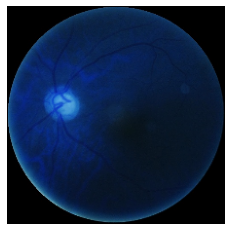

In [90]:
plt.axis('off')
plt.imshow(x[2])

In [91]:
predicted = classifier.predict(np.array([x0_resized, x1_resized, x2_resized]))
predicted = np.argmax(predicted, axis=1)
predicted

array([620, 862, 862], dtype=int64)

## Taking a pretrained model and retraining it

In [92]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [93]:
num_of_classes = 2

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_classes)
])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 1280)              2257984   
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 2562      
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [94]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)

Epoch 1/5
20/20 [==============================] - 26s 986ms/step - loss: 0.6954 - accuracy: 0.5937
Epoch 2/5
20/20 [==============================] - 20s 980ms/step - loss: 0.5524 - accuracy: 0.7213
Epoch 3/5
20/20 [==============================] - 19s 958ms/step - loss: 0.4925 - accuracy: 0.7764
Epoch 4/5
20/20 [==============================] - 20s 989ms/step - loss: 0.4728 - accuracy: 0.7780
Epoch 5/5
20/20 [==============================] - 20s 982ms/step - loss: 0.4457 - accuracy: 0.8079


In [95]:
model.evaluate(x_val,y_val)

3/3 [==============================] - 3s 727ms/step - loss: 0.4891 - accuracy: 0.7468


[0.4890960454940796, 0.746835470199585]

In [96]:
y_pre = model.predict(x_val)
y_pred = [np.argmax(i) for i in y_pre]
y_pred[:10]

[0, 1, 0, 1, 1, 1, 0, 0, 1, 0]

In [97]:
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75        40
           1       0.74      0.74      0.74        39

    accuracy                           0.75        79
   macro avg       0.75      0.75      0.75        79
weighted avg       0.75      0.75      0.75        79



## EfficientNet B4 Architecture

In [98]:
model1 = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/tensorflow/efficientnet/b4/feature-vector/1",
                   trainable=False,input_shape=(224, 224, 3)),  
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [99]:
num_of_classes = 2

model1 = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_classes)
])

model1.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 1280)              2257984   
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 2562      
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [101]:
model1.compile(
  optimizer="nadam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

model1.fit(x_train, y_train, epochs=5)

Epoch 1/5
20/20 [==============================] - 22s 983ms/step - loss: 0.4434 - accuracy: 0.8000
Epoch 2/5
20/20 [==============================] - 19s 951ms/step - loss: 0.4197 - accuracy: 0.8236
Epoch 3/5
20/20 [==============================] - 19s 960ms/step - loss: 0.4097 - accuracy: 0.8299
Epoch 4/5
20/20 [==============================] - 20s 988ms/step - loss: 0.3955 - accuracy: 0.8394
Epoch 5/5
20/20 [==============================] - 20s 988ms/step - loss: 0.3785 - accuracy: 0.8520


In [102]:
model1.evaluate(x_val,y_val)

3/3 [==============================] - 4s 749ms/step - loss: 0.4568 - accuracy: 0.7722


[0.4567870497703552, 0.7721518874168396]

In [103]:
y_pre = model1.predict(x_val)
y_pred = [np.argmax(i) for i in y_pre]
y_pred[:10]

[0, 0, 0, 1, 1, 0, 1, 0, 1, 0]

In [104]:
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.82      0.79        40
           1       0.80      0.72      0.76        39

    accuracy                           0.77        79
   macro avg       0.78      0.77      0.77        79
weighted avg       0.77      0.77      0.77        79



## Using VGG-16 Model

In [105]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.models import Sequential
from keras import layers,models
from keras.layers import Flatten,Dense
from keras.models import Model

In [106]:
IMAGE_SIZE = [224,224]

In [107]:
vgg = VGG16(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)

In [108]:
for layers in vgg.layers:
    layers.trainable = False

In [109]:
x = Flatten()(vgg.output)

In [110]:
prediction = Dense(2,activation = 'softmax')(x)

In [111]:
model2 = Model(inputs = vgg.input, outputs = prediction) 

In [112]:
model2.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [113]:
model2.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])

In [114]:
# Computation power consuption is high in this architecture (almost 8 times more)
model2.fit(x_train,y_train,epochs=6)

Epoch 1/6


C:\Users\KIIT\anaconda3\lib\site-packages\keras\backend.py:4906: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


20/20 [==============================] - 154s 8s/step - loss: 1.0019 - accuracy: 0.5654
Epoch 2/6
20/20 [==============================] - 150s 7s/step - loss: 0.5774 - accuracy: 0.7307
Epoch 3/6
20/20 [==============================] - 147s 7s/step - loss: 0.4355 - accuracy: 0.7843
Epoch 4/6
20/20 [==============================] - 144s 7s/step - loss: 0.4078 - accuracy: 0.7953
Epoch 5/6
20/20 [==============================] - 150s 8s/step - loss: 0.4049 - accuracy: 0.7890
Epoch 6/6
20/20 [==============================] - 155s 8s/step - loss: 0.3315 - accuracy: 0.8661


In [115]:
model2.evaluate(x_test,y_test)

3/3 [==============================] - 20s 6s/step - loss: 0.4010 - accuracy: 0.8250


[0.4010459780693054, 0.824999988079071]

In [116]:
y_pre = model2.predict(x_val)
y_pred = [np.argmax(i) for i in y_pre]
y_pred[:10]

[0, 0, 0, 1, 1, 0, 1, 0, 1, 0]

In [117]:
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.82      0.79        40
           1       0.80      0.72      0.76        39

    accuracy                           0.77        79
   macro avg       0.78      0.77      0.77        79
weighted avg       0.77      0.77      0.77        79



# Inception V3 Model

In [118]:
# This requires the IMAGESIZE of (299,299,3)

In [119]:
data1 = []
for i in range(794):
    img = paths[i]
    image = cv2.imread(img)
    image = cv2.resize(image,[299,299])
    data1.append(image)
data1 = np.array(data1)

In [120]:
x1 = data1
y1 = []
for i in df_combined.label:
    if(i=='cataract'):
        y1.append(1)
    else:
        y1.append(0)
y1 = np.array(y1)

In [121]:
from sklearn.model_selection import train_test_split
x1_train,x1_val,y1_train,y1_val = train_test_split(x1,y1,test_size=0.2)
x1_val,x1_test,y1_val,y1_test = train_test_split(x1_val,y1_val,test_size=0.5)

print(len(x1_train))
print(len(x1_val))
print(len(x1_test))

635
79
80


In [122]:
pretrained_model_without_top_layer = hub.KerasLayer(
    "https://tfhub.dev/google/imagenet/inception_v3/feature_vector/1",
    input_shape=(299, 299, 3), trainable=False)

In [123]:
model3 = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_classes)
])

model3.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_3 (KerasLayer)   (None, 2048)              21802784  
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 4098      
Total params: 21,806,882
Trainable params: 4,098
Non-trainable params: 21,802,784
_________________________________________________________________


In [135]:
model3.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [136]:
# There's something error, model getting overfitted onto Normal Class
model3.fit(x1_train,y1_train)

20/20 [==============================] - 81s 4s/step - loss: 1.1921e-07 - accuracy: 1.0000


In [134]:
y_pre = model3.predict(x1_val)
y_pred = [np.argmax(i) for i in y_pre]
y_pred[:5]

[0, 0, 0, 0, 0]

In [129]:
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.51      1.00      0.67        40
           1       0.00      0.00      0.00        39

    accuracy                           0.51        79
   macro avg       0.25      0.50      0.34        79
weighted avg       0.26      0.51      0.34        79



C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
